In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## User defined input:

In [2]:
video_filepath = 'spiking_neuron.avi'
signal_to_noise_ratio = 1.6
window_size = 8

## Load & preprocess Data:

In [3]:
# Load Calcium imaging data:
frames = iio.imread('spiking_neuron.avi')
print(f'Original shape: {frames.shape}') # Shape reflects: number of frames, image height, image width, color channels

# Convert from RGB to Gray scale:
gray_scale_frames = frames[:, :, :, 0].copy()
print(f'Shape after conversion to gray scale: {gray_scale_frames.shape}') # Shape reflects: number of frames, image height, image width

Original shape: (999, 165, 203, 3)
Shape after conversion to gray scale: (999, 165, 203)


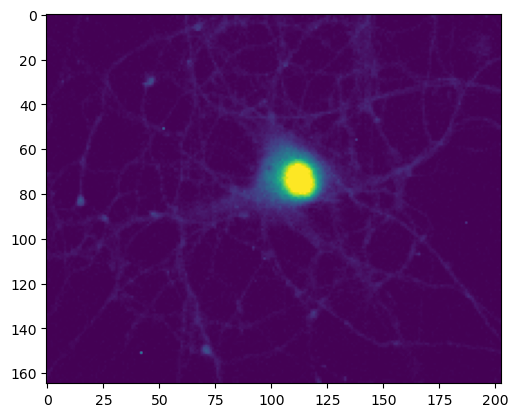

In [4]:
# Plot first frame, colorization is automatically done by matplotlib, can be changed by adding: cmap = 'grey'
plt.imshow(gray_scale_frames[0])

## Core processing steps:

### 1) Split image into small squares according to `window_size`:

In [5]:
# Representatively done only for a selected region of the image
square_y_coords = slice(70, 70 + window_size)
square_x_coords = slice(105, 105 + window_size)
selected_square = gray_scale_frames[:, square_y_coords, square_x_coords]
print(f'Shape of selected square: {selected_square.shape}') # Shape represents: number of frames, square height, square width

Shape of selected square: (999, 8, 8)


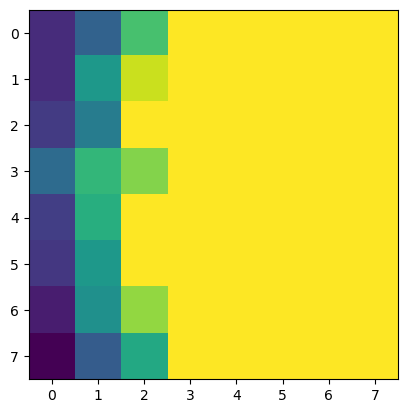

In [6]:
plt.imshow(selected_square[0])

### 2) For each square:

#### a) Create timeseries data as function of mean bit values over time (= development of fluroescence intensity):

In [7]:
intensities = np.mean(selected_square, axis = (1,2))
intensities.shape

(999,)

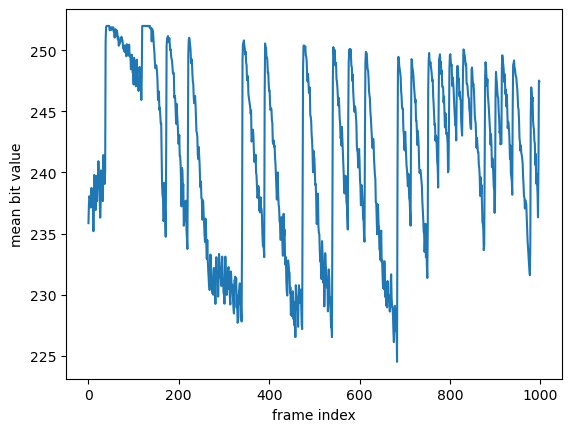

In [8]:
plt.plot(intensities)
plt.xlabel('frame index')
plt.ylabel('mean bit value')
plt.show()

#### b) Detect peaks using continous wavelet transformation:

In [9]:
frame_idxs_of_peaks = signal.find_peaks_cwt(vector = intensities, wavelet = signal.ricker, widths = np.arange(1, 81), min_length = 7, noise_perc = 25, min_snr = 1.6)

#### c) Create (& save) plot for results:

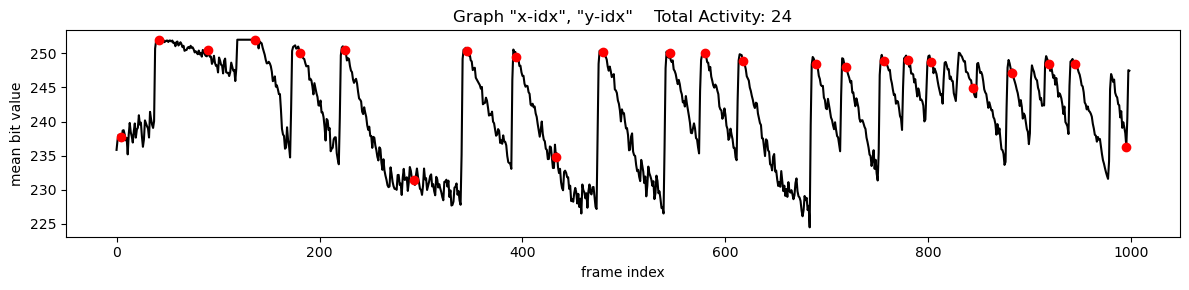

In [10]:
plt.figure(figsize = (12, 3), facecolor = 'white')
plt.plot(intensities, zorder = 0, c='black')
plt.scatter(x = frame_idxs_of_peaks, y = intensities[frame_idxs_of_peaks], color = 'red')
plt.ylabel('mean bit value')
plt.xlabel('frame index')
plt.title(f'Graph "x-idx", "y-idx"    Total Activity: {frame_idxs_of_peaks.shape[0]}')
plt.tight_layout()
#plt.savefig('Graph_x-idx_y-idx.png')

### 3) Compile results from all squares and create summary output plot(s)

In [11]:
# ToDo